** 스마트워치 센서 데이터 기반 행동 분류 2일차 **
# --------- 미션4 : 모델 튜닝 ---------


### (0) 미션 이해하기
   * AI 모델은 튜닝을 통해 더 높은 정확도를 도출할 수 있습니다.
   * Hyper Parameter Tuning 튜닝기법과 Feature Selection 튜닝기법을 사용해 더 높은 정확도를 도출해 보세요.<br>

      - Hyper Parameter Tuning: AI 모델 학습시 매개변수를 조정하여 최상의 성능을 발휘할 수 있는 매개변수를 찾는 방법
      
      - Feature Selection: 모델링 시 raw data의 모든 feature를 사용하는 것은 computing power와 memory 측면에서 매우 비효율적이기 때문에 일부 영향도가 높은 중요 feature만 선택 후 학습하여 모델의 성능을 높이는 방법
   



<span style="background-color:#fff5b1"><span style="color:black"><U>※ 미션완수 조건: XGBoost 알고리즘에 Hyper Parameter Tuning 기법과 Feature Selection을 사용해, 최고의 정확도가 높아지도록 모델링을 수행해 보세요.<U></span></span>

<span style="background-color:#fff5b1"><span style="color:red"><U>※ 함수/변수명, 데이터 타입 잘 확인하고 코드를 작성하세요 <U></span></span>

---

### (1) 데이터 불러오기
* pandas, numpy, matplotlib, seaborn, os 등 데이터 분석에필요한 라이브러리와 모듈을 불러오세요.
* 라이브러이가 없을땐 !pip 명령어를 통해 라이브러리를 설치 하세요.
* 현위치 하위 'data' 폴더에서 'train_data.csv' 파일 읽어 오세요.

	- 실습순서: 라이브러리 불러오기 -> 현재 디렉토리 확인 -> train_data.csv 불러오기 -> 'subject' 제거 -> result3.csv 불러오기

In [1]:
# pandas, numpy, matplotlib, seaborn, os 등 필요 라이브러리 호출
# 데이터를 나누기 위한 sklearn.model_selection 모듈의 train_test_split 함수 사용
# 모델 성능 평가 출력을 위해 sklearn.metrics 모듈의 모든 클래스 사용

# pandas, numpy, matplotlib, seaborn, os 등 필요 라이브러리 호출
# 데이터를 나누기 위한 sklearn.model_selection 모듈의 train_test_split 함수 사용
# 모델 성능 평가 출력을 위해 sklearn.metrics 모듈의 모든 클래스 사용

# pandas, numpy, matplotlib.pyplot, seaborn, os 등 필요 라이브러리 호출
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

import scipy.stats as spst  # 상관분석 라이브러리

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')


# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import *



* train 데이터 불러오기

In [44]:
# 현재 디렉토리 위치 확인
# 아래의 결과는 강사의 현재 위치(에이블러 별 다를 수 있음)


'c:\\Users\\User\\Desktop\\aivle\\3기 미프 3차 머신러닝\\0303'

In [2]:
# data 변수에 train_data.csv 파일을 불러와서 할당
# train_data.csv 파일은 현재위치의 하위 data 폴더안에 있습니다.
# 잘 할당 되었는지 데이터 확인

data = pd.read_csv('./data/train_data.csv')
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS


In [3]:
# data 변수(데이터셋)에서 행동분류에 불필요한 'subject'열 제거
# 'subject'열이 잘 제거 되었는지 확인
data.drop('subject', axis=True, inplace=True)
data



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.277194,-0.012389,-0.131974,-0.994046,-0.940578,-0.917337,-0.994261,-0.932830,-0.908088,-0.936219,...,-0.305772,-0.690363,-0.034888,-0.261437,-0.391477,-0.877612,-0.912365,0.114009,0.080146,SITTING
5877,0.191568,0.013328,-0.105174,-0.126969,-0.121729,-0.327480,-0.192523,-0.109923,-0.295286,0.078644,...,-0.622617,-0.879215,0.721718,0.623151,0.866858,-0.445660,-0.690278,0.303194,-0.044188,WALKING_UPSTAIRS
5878,0.267981,-0.018348,-0.107440,-0.991303,-0.989881,-0.990313,-0.992386,-0.988852,-0.991237,-0.936099,...,-0.597610,-0.886851,0.060173,0.228739,0.684400,-0.216665,0.620363,-0.437247,-0.571840,LAYING
5879,0.212787,-0.048130,-0.121001,-0.041373,0.052449,-0.585361,-0.100714,0.023353,-0.554707,0.219814,...,0.196921,-0.053556,0.260880,0.551742,-0.943773,-0.862899,-0.718009,0.292856,0.024920,WALKING_UPSTAIRS


* result 데이터 불러오기

In [5]:
# 모델별 정확도를 비교 할 수 있도록 결과 저장 파일 호출 
# result 변수에 'data' 폴더에서 result3.csv 파일을 불러와서 할당
# 잘 불러와 졌는지 확인

result = pd.read_csv('./data/result3.csv')
result

,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,knn,0.952408,0.956144
2,train,lr,0.984703,0.986111
3,train,gb,0.981870,0.983141
4,train,xgb,0.990368,0.991052


### (2) HyperParameter Tuning

	- 실습순서: 라이브러리 호출-> 데이터 분할/가공 -> Grid Search -> XGBoost 하이퍼파라미터 적용 모델링 -> 결과 출력

* #### XGBoost Hyper Parameter Tuning
    - GridSearchCV 클래스를 사용하여 최고의 성능을 내기위한 파라미터를 찾고 모델링에 적용 해보세요.
    - 튜닝 전/후의 정확도를 비교해 보세요.


In [6]:
# XGBClassifier 알고리즘 사용을 위한 모듈 추가
# GridSearchCV 모듈을 사용하기 위한 모듈 추가(scikit-learn 라이브러리에 포함)

from sklearn.model_selection import GridSearchCV


In [7]:
# x, y 데이터 나누기 (target = 'Activity')
target = 'Activity'
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [8]:
# XGBoost 는 문자형 데이터로 학습할 수 없습니다. 
# y_map 변수를 생성해서 target 데이터(y)를 숫자형 형태로 치환하여 할당
# 데이터 치환 함수: map
# 치환 데이터: 'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_UPSTAIRS':4, 'WALKING_DOWNSTAIRS':5
y_map = y.map({'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_UPSTAIRS':4, 'WALKING_DOWNSTAIRS':5})
y_map


0       0
1       2
2       0
3       3
4       5
       ..
5876    1
5877    4
5878    2
5879    4
5880    1
Name: Activity, Length: 5881, dtype: int64

In [9]:
# x,y_map를 사용하여 학습 데이터 분할 비율: 학습데이터 7 : 검증데이터 3
# random_state=2023

x_train, x_test, y_train, y_test = train_test_split(x,y_map, test_size=0.3, random_state=2023)



* GridSearchCV 로 하이퍼 파라미터 찾기

In [10]:
# 파라미터 그리드를 생성할 params 변수 생성 후 파라미터의 범위를 할당
# 파라미터 범위: {'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [2,3,4]}
# xgb_model 변수에 XGBClassifier 초기화(random_state=2023)
# GridSearchCV에 파라미터를 넣고 모델 학습
# 파라미터: estimator=xgb_model, param_grid=params, cv = 3, verbose=2
# GridSearchCV가 적용된 모델의 변수명은 'gs_xgb_model'
# GridSearchCV가 적용된 모델의 예측결과 변수명은 'gs_xgb_pred'
# 제대로 학습 되었는지 예측결과 확인
# 그리드 서칭은 실습 노트북 기준 약 15분 소요


params = {'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [2,3,4] }
xgb_model = XGBClassifier(random_state=2023)
gs_xgb_model = GridSearchCV(estimator=xgb_model, param_grid=params, cv = 3, verbose=2)
gs_xgb_model.fit(x_train, y_train)
gs_xgb_pred = gs_xgb_model.predict(x_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ....................learning_rate=0.01, max_depth=2; total time=  15.7s
[CV] END ....................learning_rate=0.01, max_depth=2; total time=  18.7s
[CV] END ....................learning_rate=0.01, max_depth=2; total time=  23.4s
[CV] END ....................learning_rate=0.01, max_depth=3; total time=  33.3s
[CV] END ....................learning_rate=0.01, max_depth=3; total time=  33.0s
[CV] END ....................learning_rate=0.01, max_depth=3; total time=  35.4s
[CV] END ....................learning_rate=0.01, max_depth=4; total time=  43.2s
[CV] END ....................learning_rate=0.01, max_depth=4; total time=  42.9s
[CV] END ....................learning_rate=0.01, max_depth=4; total time=  43.8s
[CV] END .....................learning_rate=0.1, max_depth=2; total time=  24.6s
[CV] END .....................learning_rate=0.1, max_depth=2; total time=  23.0s
[CV] END .....................learning_rate=0.1, 

In [11]:
# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)

print('accuracy_score: ',accuracy_score(y_test,gs_xgb_pred))
print('='*50)
print('\n confusion_matrix: \n',confusion_matrix(y_test,gs_xgb_pred))
print('='*50)
print('\n classification_report: \n',classification_report(y_test,gs_xgb_pred))


accuracy_score:  0.9915014164305949

 confusion_matrix: 
 [[319   7   0   0   0   0]
 [  8 320   0   0   0   0]
 [  0   0 354   0   0   0]
 [  0   0   0 271   0   0]
 [  0   0   0   0 254   0]
 [  0   0   0   0   0 232]]

 classification_report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       326
           1       0.98      0.98      0.98       328
           2       1.00      1.00      1.00       354
           3       1.00      1.00      1.00       271
           4       1.00      1.00      1.00       254
           5       1.00      1.00      1.00       232

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



In [13]:
# GridSearchCV 실핼 후 최적의 성능 모델링에 사용된 베스트 파라미터 확인
# 참고 함수: .best_params_

# 최적 파라미터, 예측 최고 성능
print('=' * 80)
print('최적파라미터:', gs_xgb_model.best_params_)
print('-' * 80)
print('최고성능:', gs_xgb_model.best_score_)
print('=' * 80)


최적파라미터: {'learning_rate': 0.3, 'max_depth': 3}
--------------------------------------------------------------------------------
최고성능: 0.9844509232264335


* xgb 튜닝 모델 학습

In [14]:
# 베스트 파라미터를 적용한 xgb 모델 선언(초기화), 학습, 예측
# AI모델 변수명: xgb_hpt_model 예측결과 변수명: xgb_hpt_pred
# random_state=2023
params = {'learning_rate': 0.3, 'max_depth': 3 }

xgb_hpt_model = XGBClassifier(**params,random_state=2023)
xgb_hpt_model.fit(x_train, y_train)
xgb_hpt_pred = xgb_hpt_model.predict(x_test)
xgb_hpt_pred


array([3, 0, 2, ..., 3, 3, 2], dtype=int64)

In [16]:
# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)

print('accuracy_score: ',accuracy_score(y_test,xgb_hpt_pred))
print('='*50)
print('\n confusion_matrix: \n',confusion_matrix(y_test,xgb_hpt_pred))
print('='*50)
print('\n classification_report: \n',classification_report(y_test,xgb_hpt_pred))


accuracy_score:  0.9915014164305949

 confusion_matrix: 
 [[319   7   0   0   0   0]
 [  8 320   0   0   0   0]
 [  0   0 354   0   0   0]
 [  0   0   0 271   0   0]
 [  0   0   0   0 254   0]
 [  0   0   0   0   0 232]]

 classification_report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       326
           1       0.98      0.98      0.98       328
           2       1.00      1.00      1.00       354
           3       1.00      1.00      1.00       271
           4       1.00      1.00      1.00       254
           5       1.00      1.00      1.00       232

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



In [19]:
# result 변수(데이터프레임) 마지막에 xgb 튜닝 모델 평가결과 추가 
# 할당할 정보는 데이터명('train'), 모델명('xgb_hpt'), 'accuracy_score', 'f1_score' 예측 결과 할당
# 정확히 구성되었나 확인

result = result.append({'data':'train','model_name':'xgb_hpt','accuracy_score':accuracy_score(y_test, xgb_hpt_pred), 'f1_score': f1_score(y_test, xgb_hpt_pred, average = 'macro')}, ignore_index=True)
result

,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,knn,0.952408,0.956144
2,train,lr,0.984703,0.986111
3,train,gb,0.981870,0.983141
4,train,xgb,0.990368,0.991052
5,train,xgb_hpt,0.991501,0.992355


### (3) Feature Selection

* Feature Selection 기법을 사용하여 모델을 학습 시켜보세요.
* 중요도 상위 95개, 중요도 상위 50개의 feature 데이터를 선별하여 모델을 학습시켜 보세요.
* 사용할 AI 알고리즘은 가장 정확도가 높았던 XGBoost에 하이퍼파라미터를 적용하여 학습 시킵니다.
* result 변수에 저장된 그동안 학습한 모델 결과와 Feature Selection 기법을 사용한 모델의 정확도를 비교해 보세요.

	- 실습순서: 중요도 데이터프레임 생성-> 데이터 분할/가공 -> Feature Selection(상위 95 순위 까지 Features) -> Feature Selection(상위 50 순위까지 Features) -> 최적의 Feature Selection 찾기 -> 모델링-> 결과 저장 

* Feature Selection을 위한 변수별 중요도 추출

In [20]:
# importance_sort 데이터프레임 변수 생성 초기화

importance_sort = pd.DataFrame()

In [22]:
# importance_sort['feature_name'] 열에 모델링에서 사용한 x 데이터프레임의 컬럼명을 할당

importance_sort['feature_name'] = x.columns
importance_sort

,feature_name
0,tBodyAcc-mean()-X
1,tBodyAcc-mean()-Y
2,tBodyAcc-mean()-Z
3,tBodyAcc-std()-X
4,tBodyAcc-std()-Y
...,...
556,"angle(tBodyGyroMean,gravityMean)"
557,"angle(tBodyGyroJerkMean,gravityMean)"
558,"angle(X,gravityMean)"
559,"angle(Y,gravityMean)"


In [25]:
# importance_sort['feature_importance'] 열에 앞에서 사용한 xgb_hpt_model 모델의 feature_importances 를 할당
# 참고함수: feature_importances_

importance_sort['feature_importance'] = xgb_hpt_model.feature_importances_

In [27]:
# importance_sort['feature_importance'] 를 내림차순 정열(기준열='feature_importance', 내림차순)
# 참고함수: sort_values
importance_sort.sort_values(by='feature_importance', ascending=False, inplace=True)


In [28]:
# feature_importance 내림차순 정렬 때문에 엉킨 인덱스 재설정
# 참고함수: reset_index
# 파라미터: drop=True, inplace=True
# 제대로 정렬 되었는지 데이터 프레임에 확인
importance_sort.reset_index(drop=True, inplace=True)
importance_sort

,feature_name,feature_importance
0,fBodyAccMag-mad(),0.103513
1,fBodyAcc-skewness()-X,0.069626
2,fBodyAccMag-std(),0.054183
3,"fBodyAcc-bandsEnergy()-1,8.2",0.053060
4,"tGravityAcc-arCoeff()-Z,1",0.052357
...,...,...
556,fBodyAcc-entropy()-X,0.000000
557,fBodyAcc-iqr()-Z,0.000000
558,fBodyAcc-iqr()-Y,0.000000
559,fBodyAcc-energy()-Z,0.000000


* 중요도 상위 95개의 Features 선별 학습

In [29]:
# importance_95 변수에 중요도로 정렬된 importance_sort['feature_importance']의 상위 95 순위의 feature_name 을 할당
# 인덱스 번호가 낮을 수록 중요도 순위가 높은 feature
# 슬라이싱으로 0부터 95까지 짜르면 

importance_95 = importance_sort['feature_name'][:95]
importance_95

0                fBodyAccMag-mad()
1            fBodyAcc-skewness()-X
2                fBodyAccMag-std()
3     fBodyAcc-bandsEnergy()-1,8.2
4        tGravityAcc-arCoeff()-Z,1
                  ...             
90                fBodyAcc-max()-Y
91            tBodyAcc-entropy()-X
92      tBodyAccJerk-arCoeff()-Z,1
93       tGravityAcc-arCoeff()-Y,3
94               fBodyGyro-iqr()-Y
Name: feature_name, Length: 95, dtype: object

- 슬라이싱 참고 사이트: https://bearwoong.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-DataFrame-%EC%9D%B8%EB%8D%B1%EC%8B%B1-%ED%95%98%EB%8A%94-%EB%B0%A9%EB%B2%95df-dfloc-dfiloc

In [30]:
# 훈련 데이터 생성
# x_train_95 변수에 x_train 에서 중요 feature 상위 95 순위 데이터 할당  
# x_val_95 변수에 x_val 에서 중요 feature 상위 95 순위 데이터  할당
# 상위 95순위 직접 인덱싱은 importance_95 사용할 것

x_train_95 = x_train[importance_95]
x_test_95 = x_test[importance_95]



In [31]:
# XGBClassifier 모델 초기화,학습,예측
# AI모델 변수명: xgb95_model , 예측결과 변수명: xgb95_pred
# random_state=2023

params = {'learning_rate': 0.3, 'max_depth': 3 }

xgb95_model = XGBClassifier(**params,random_state=2023)
xgb95_model.fit(x_train_95, y_train)
xgb95_pred = xgb95_model.predict(x_test_95)
xgb95_pred


array([3, 0, 2, ..., 3, 3, 2], dtype=int64)

In [34]:
# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)


print('accuracy_score: ',accuracy_score(y_test,xgb95_pred))
print('='*50)
print('\n confusion_matrix: \n',confusion_matrix(y_test,xgb95_pred))
print('='*50)
print('\n classification_report: \n',classification_report(y_test,xgb95_pred))

accuracy_score:  0.9920679886685553

 confusion_matrix: 
 [[320   6   0   0   0   0]
 [  5 323   0   0   0   0]
 [  0   0 354   0   0   0]
 [  0   0   0 270   0   1]
 [  0   0   0   0 254   0]
 [  0   0   0   1   1 230]]

 classification_report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       326
           1       0.98      0.98      0.98       328
           2       1.00      1.00      1.00       354
           3       1.00      1.00      1.00       271
           4       1.00      1.00      1.00       254
           5       1.00      0.99      0.99       232

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



In [35]:
# result 변수에 result 데이터프레임 마지막에 모델 평가 결과 추가 (append 함수는 inplace 파라미터가 없음)
# 할당할 정보는 데이터명('train'), 모델명('xgb95_hpt'), 'accuracy_score', 'f1_score' 예측 결과 할당
# 정확히 구성되었나 확인

result = result.append({'data':'train','model_name':'xgb95_hpt','accuracy_score':accuracy_score(y_test, xgb95_pred), 'f1_score': f1_score(y_test, xgb95_pred, average = 'macro')}, ignore_index=True)
result

,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,knn,0.952408,0.956144
2,train,lr,0.984703,0.986111
3,train,gb,0.981870,0.983141
4,train,xgb,0.990368,0.991052
5,train,xgb_hpt,0.991501,0.992355
6,train,xgb95_hpt,0.992068,0.992371


* 중요도 상위 50개 데이터 모델링(Feature Selection 사용)

In [37]:
# importance_50 변수에 중요도로 정렬된 importance_sort 데이터프레임의 feature_importance 상위 50 순위의 feature_name 을 할당
# 인덱스 번호가 낮을 수록 중요도 순위가 높은 feature

importance_50 = importance_sort['feature_name'][:50]
importance_50

0                      fBodyAccMag-mad()
1                  fBodyAcc-skewness()-X
2                      fBodyAccMag-std()
3           fBodyAcc-bandsEnergy()-1,8.2
4              tGravityAcc-arCoeff()-Z,1
5                   tGravityAcc-mean()-X
6              fBodyBodyAccJerkMag-max()
7                    tBodyAcc-energy()-X
8                  tBodyGyroJerk-mad()-X
9              tBodyGyroJerk-entropy()-X
10                  angle(Y,gravityMean)
11                  tBodyGyro-energy()-Z
12                  tBodyAccJerk-iqr()-Y
13                      tBodyAcc-max()-X
14                      tBodyAcc-std()-X
15                     fBodyGyro-mad()-X
16                fBodyAccJerk-maxInds-Z
17             tGravityAcc-arCoeff()-Y,1
18                  tGravityAcc-mean()-Y
19             tGravityAcc-arCoeff()-Z,2
20                   tBodyAcc-energy()-Y
21                  tBodyAccJerk-iqr()-Z
22                      tBodyAcc-mad()-Y
23            fBodyAcc-bandsEnergy()-1,8
24             t

In [38]:
# 훈련 데이터 생성
# x_train_50 변수에x_train 에서 중요 feature 상위 50 순위 데이터 할당  
# x_val_50 변수에 x_val 에서 중요 feature 상위 50 순위 데이터  할당
# 상위 50순위 직접 인덱싱은 importance_50 사용할 것


x_train_50 = x_train[importance_50]
x_test_50 = x_test[importance_50]


In [39]:
# XGBClassifier 모델 초기화,학습,예측
# AI모델 변수명: xgb50_model , 예측결과 변수명: xgb50_pred
# random_state=2023

params = {'learning_rate': 0.3, 'max_depth': 3 }

xgb50_model = XGBClassifier(**params,random_state=2023)
xgb50_model.fit(x_train_50, y_train)
xgb50_pred = xgb50_model.predict(x_test_50)
xgb50_pred


array([3, 0, 2, ..., 3, 3, 2], dtype=int64)

In [41]:
# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)


print('accuracy_score: ',accuracy_score(y_test,xgb50_pred))
print('='*50)
print('\n confusion_matrix: \n',confusion_matrix(y_test,xgb50_pred))
print('='*50)
print('\n classification_report: \n',classification_report(y_test,xgb50_pred))

accuracy_score:  0.9886685552407932

 confusion_matrix: 
 [[320   6   0   0   0   0]
 [  6 322   0   0   0   0]
 [  0   0 354   0   0   0]
 [  0   0   0 267   3   1]
 [  0   0   0   0 253   1]
 [  0   0   0   2   1 229]]

 classification_report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       326
           1       0.98      0.98      0.98       328
           2       1.00      1.00      1.00       354
           3       0.99      0.99      0.99       271
           4       0.98      1.00      0.99       254
           5       0.99      0.99      0.99       232

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



In [42]:
# result 변수에 result 데이터프레임 마지막에 모델 평가 결과 추가 (append 함수는 inplace 파라미터가 없음)
# 할당할 정보는 데이터명('train'), 모델명('xgb50_hpt'), 'accuracy_score', 'f1_score' 예측 결과 할당
# 정확히 구성되었나 확인

result = result.append({'data':'train','model_name':'xgb50_hpt','accuracy_score':accuracy_score(y_test, xgb50_pred), 'f1_score': f1_score(y_test, xgb50_pred, average = 'macro')}, ignore_index=True)
result


,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,knn,0.952408,0.956144
2,train,lr,0.984703,0.986111
3,train,gb,0.981870,0.983141
4,train,xgb,0.990368,0.991052
5,train,xgb_hpt,0.991501,0.992355
6,train,xgb95_hpt,0.992068,0.992371
7,train,xgb50_hpt,0.988669,0.988601


--- 
---

<span style="background-color:#fff5b1"><span style="color:black"><도전미션> 모든 feature로 모델링 했을때와 Feature Selection을 적용해 학습했을때 서로 다른 정확도를 보여 줍니다. <br>중요도 상위 feature 를 몇 개까지 학습하는게 가장 놓은 정확도를 도출 할 수 있는지 코드를 작성해 보세요. </span></span>

<도전미션1> Feature Selection 을 사용한 정확도 최고의 학습 feature 개수 선별

	- 실습순서: for 문을 이용하여 중요도 순위 기준 Feature 1개 부터 130개 까지 학습 -> 개수별 학습 정확도 도출 -> plt.plot를 이용한 결과 시각화 -> 최적 학습 Features 개수 선정 -> 모델링 -> 결과 저장

* Feature Selection 을 반복적으로 적용해 최고 정확도의 중요 feature 개수 학습 결과 선별

- 슬라이싱 참고 사이트: https://bearwoong.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-DataFrame-%EC%9D%B8%EB%8D%B1%EC%8B%B1-%ED%95%98%EB%8A%94-%EB%B0%A9%EB%B2%95df-dfloc-dfiloc

In [43]:
# acc 데이터 프레임을 생성 및 초기화(컬럼 지정: columns=['accuracy_score'])
# for 문을 사용해 중요도 상위 feature 1개 모델링부터 상위 feature 130개  모델링까지 순차적 모델링 실행 후 각 accuracy_score 결과를 acc 변수에 누적
# 참고: 슬라이싱 할때 [:1] -> index 0 까지 짤림, [:100] -> index 99 까지 짤림, 슬라이싱 할 인덱스 번호 +1 해서 슬라이싱 할 것
# 전체 feature는 561개 이지만, 학습에 130개면 충분(약 10분 소요)
# for 매 회 마다 accuracy_score 결과 출력

acc = pd.DataFrame(columns=['accuracy_score'])

for i in range(130):

    importance_n = importance_sort['feature_name'][:i+1]

    x_train_n = x_train[importance_n]
    x_test_n = x_test[importance_n]

    xgb_n_model = XGBClassifier(learning_rate=0.3, max_depth=3, random_state=2023)
    xgb_n_model.fit(x_train_n, y_train)
    xgb_n_pred = xgb_n_model.predict(x_test_n)
    
    acc.loc[i] = accuracy_score(y_test,xgb_n_pred)
    print(acc.loc[i])

acc

accuracy_score    0.464023
Name: 0, dtype: float64
accuracy_score    0.603966
Name: 1, dtype: float64
accuracy_score    0.608499
Name: 2, dtype: float64
accuracy_score    0.647025
Name: 3, dtype: float64
accuracy_score    0.708215
Name: 4, dtype: float64
accuracy_score    0.847025
Name: 5, dtype: float64
accuracy_score    0.856091
Name: 6, dtype: float64
accuracy_score    0.863456
Name: 7, dtype: float64
accuracy_score    0.913881
Name: 8, dtype: float64
accuracy_score    0.913314
Name: 9, dtype: float64
accuracy_score    0.973938
Name: 10, dtype: float64
accuracy_score    0.973938
Name: 11, dtype: float64
accuracy_score    0.973938
Name: 12, dtype: float64
accuracy_score    0.974504
Name: 13, dtype: float64
accuracy_score    0.974504
Name: 14, dtype: float64
accuracy_score    0.977337
Name: 15, dtype: float64
accuracy_score    0.976204
Name: 16, dtype: float64
accuracy_score    0.973938
Name: 17, dtype: float64
accuracy_score    0.972238
Name: 18, dtype: float64
accuracy_score    0.97

,accuracy_score
0,0.464023
1,0.603966
2,0.608499
3,0.647025
4,0.708215
...,...
125,0.989802
126,0.989235
127,0.989235
128,0.992068


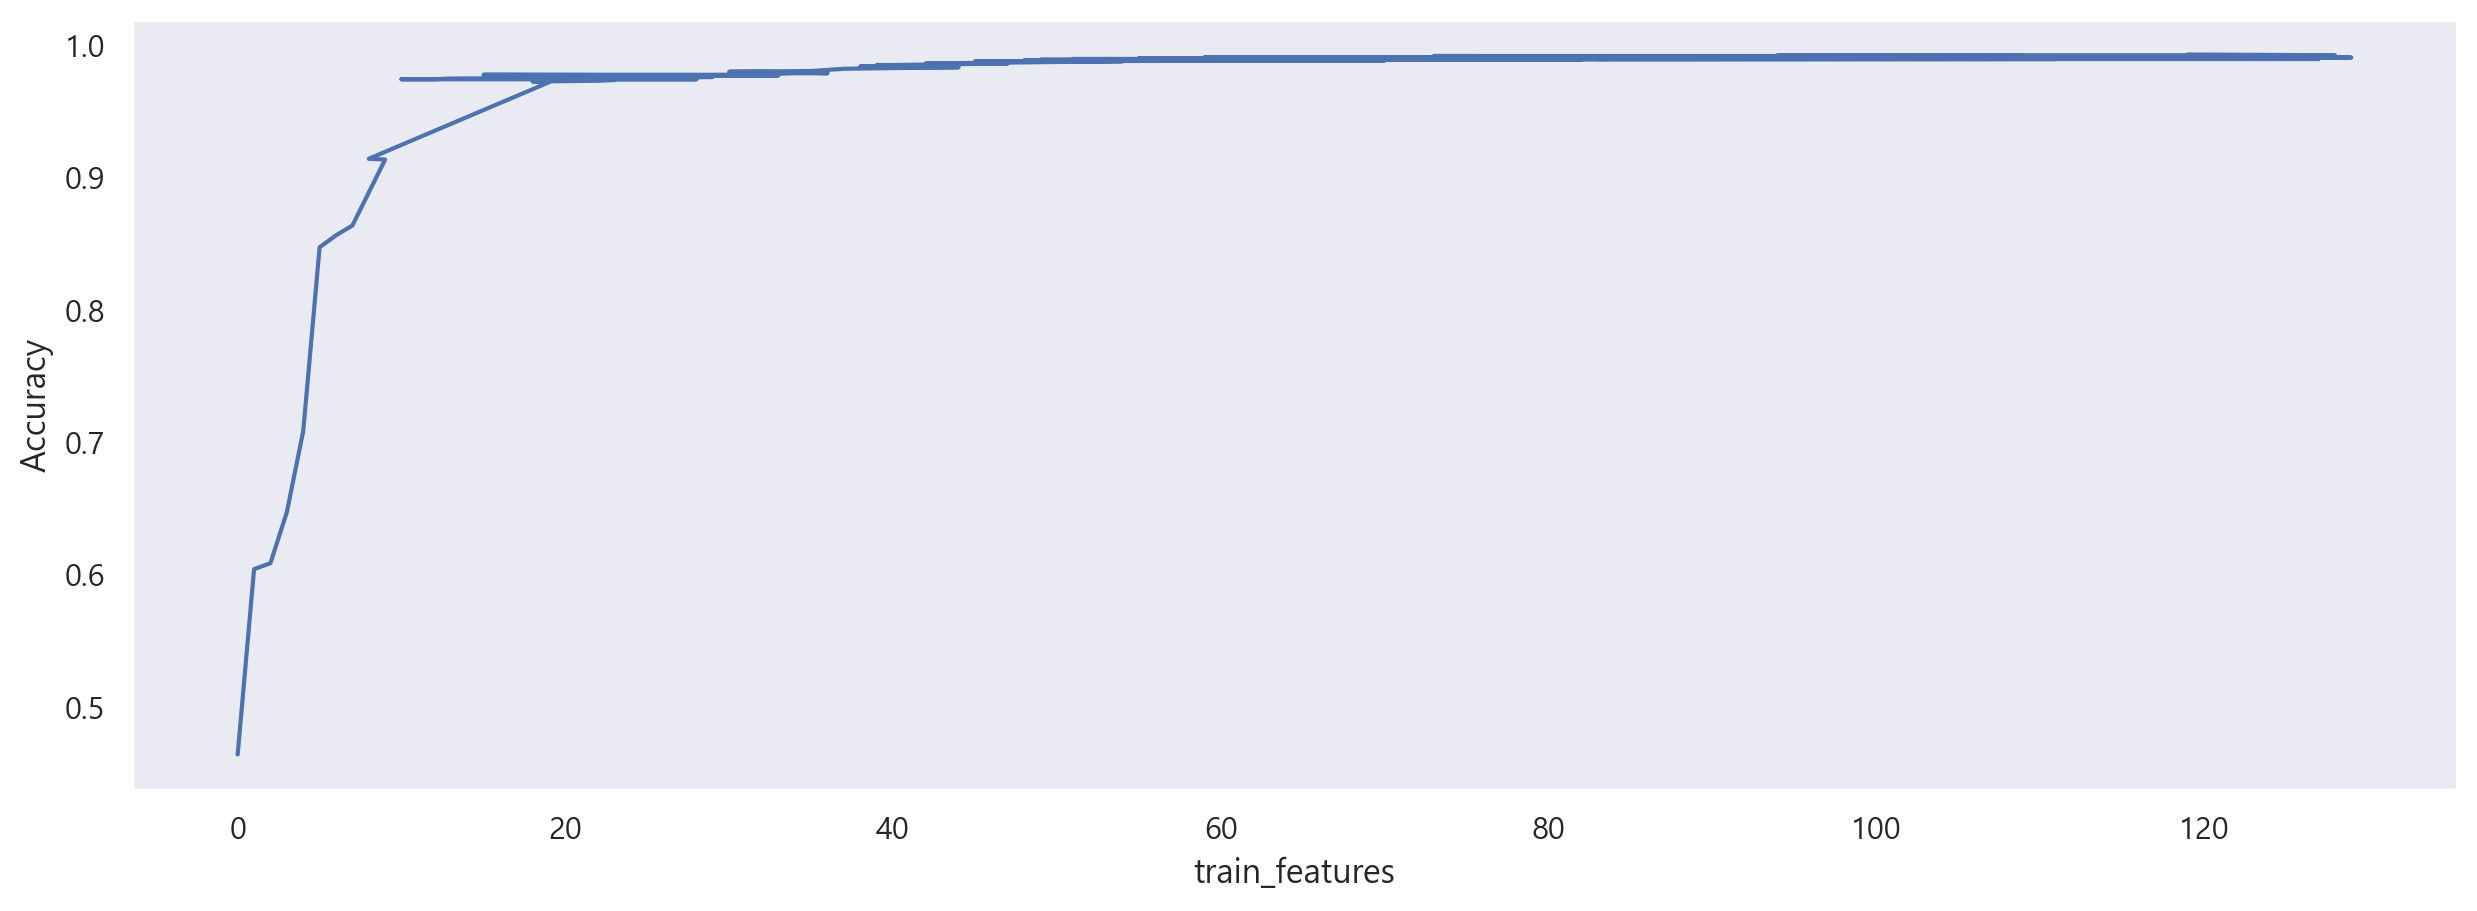

In [77]:
# plt 사용 >>> 불편
plt.figure(figsize=(15,5))
plt.plot(acc['accuracy_score'])
plt.xlabel('train_features')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

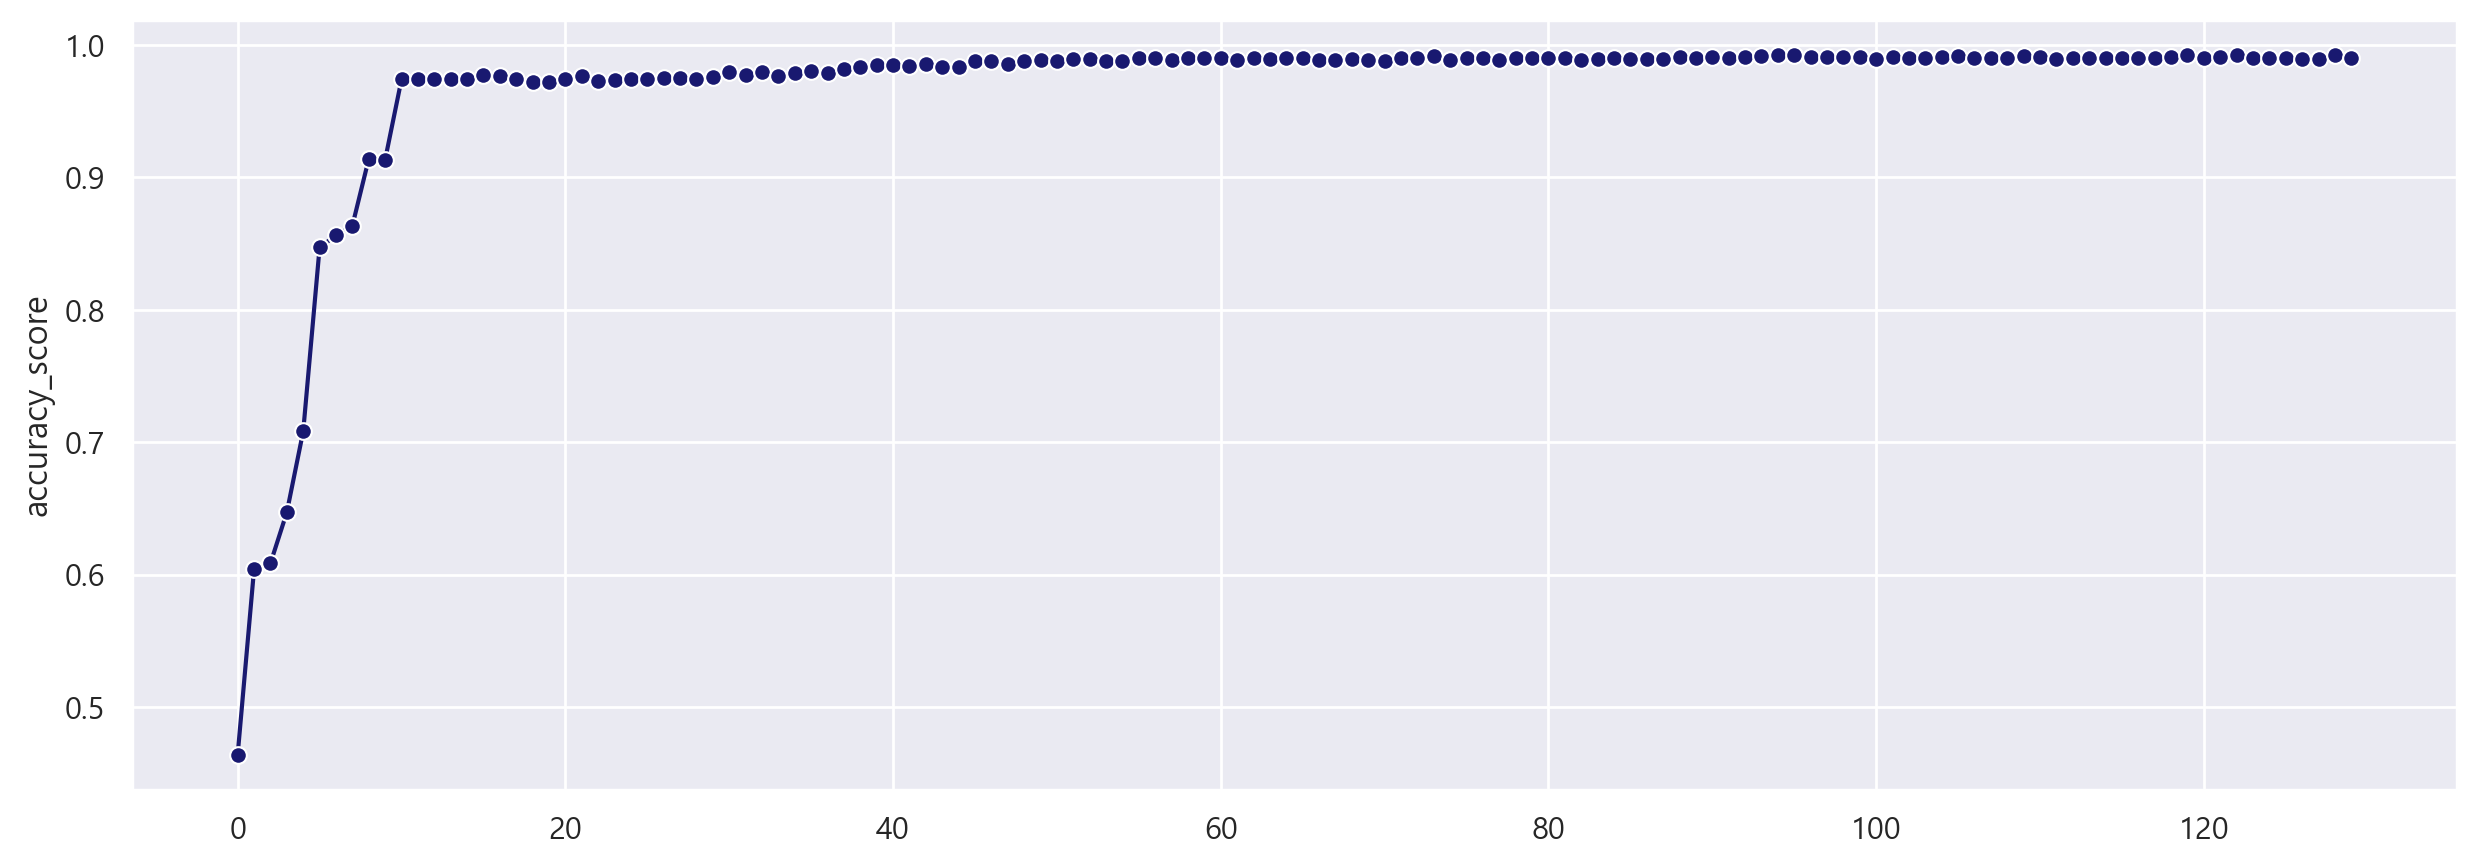

In [87]:
# sns 사용
plt.figure(figsize=(15,5))
sns.lineplot(x=acc.index, y='accuracy_score', data=acc, marker='o', color='midnightblue')
plt.show()

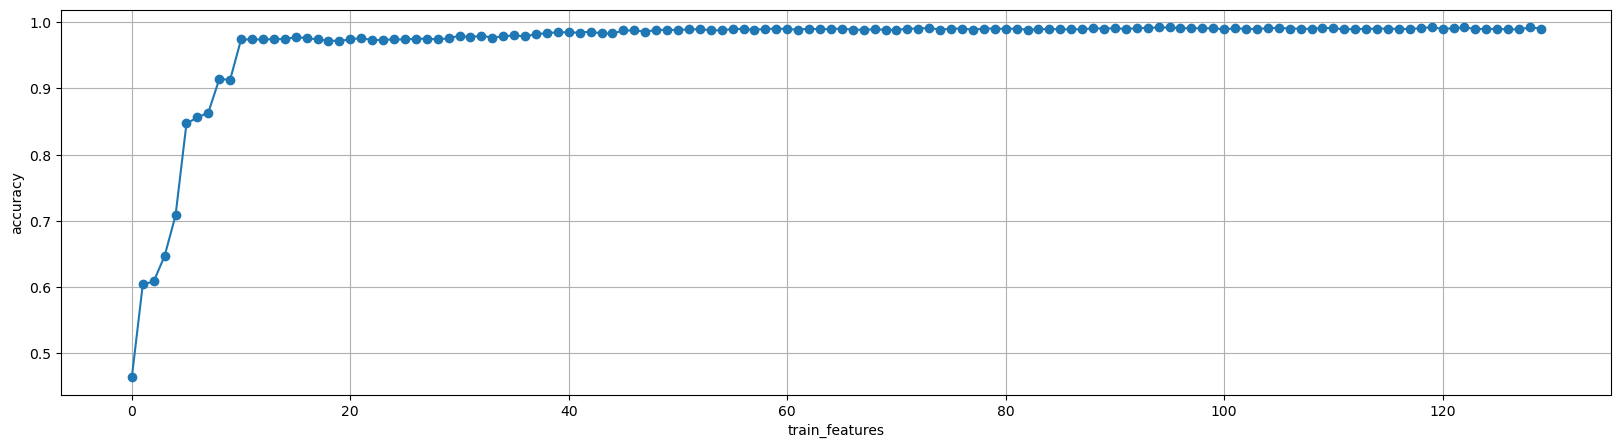

In [74]:
# accuracy_score 누적한 acc 변수 시각화
## 참고 함수: plt.plot




* 정확도 최고의 학습 Feature 개수 찾기

In [59]:
# acc 변수를 accuracy_score 기준 내림차순으로 정렬(인덱스 재설정X)
# accuracy_score 값이 가능 높을때의 인덱스명이 학습된 상위 feature 개수를 뜻함

acc.sort_values(by='accuracy_score', ascending=False, inplace=True)


,accuracy_score
119,0.992635
122,0.992068
94,0.992068
95,0.992068
128,0.992068
...,...
4,0.708215
3,0.647025
2,0.608499
1,0.603966


In [64]:
# importance_top 변수에 acc 에서 확인한 상위 feature 개수 만큼 importance_sort['feature_name']를 슬라이싱 하여 할당
# 참고: 슬라이싱 할때 [:1] -> index 0 까지 짤림, [:100] -> index 99 까지 짤림, 정확도 최고치 인덱스 값 +1 해서 슬라이싱 할 것

importance_top = importance_sort['feature_name'][:acc.index[0]+1]
importance_top

0                 fBodyAccMag-mad()
1             fBodyAcc-skewness()-X
2                 fBodyAccMag-std()
3      fBodyAcc-bandsEnergy()-1,8.2
4         tGravityAcc-arCoeff()-Z,1
                   ...             
115     tBodyGyroJerk-arCoeff()-X,3
116                tBodyAcc-mad()-X
117         tBodyGyro-arCoeff()-Y,1
118              fBodyAccMag-mean()
119          tBodyGyroJerkMag-min()
Name: feature_name, Length: 120, dtype: object

In [65]:
# 훈련 데이터 생성
# x_train_top 변수에 x_train을 중요 feature 만클 슬라이싱 한 x_train[importance_top] 할당
# x_val_top 변수에 x_val을 중요 feature 만클 슬라이싱 한 x_val[importance_top] 할당

x_train_top = x_train[importance_top]
x_test_top = x_test[importance_top]



In [66]:
# XGBClassifier 모델 초기화,학습,예측
# AI모델 변수명: xgb_top_model , 예측결과 변수명: xgb_top_pred
# random_state=2023

params = {'learning_rate': 0.3, 'max_depth': 3 }

xgb_top_model = XGBClassifier(**params,random_state=2023)
xgb_top_model.fit(x_train_top, y_train)
xgb_top_pred = xgb_top_model.predict(x_test_top)
xgb_top_pred



array([3, 0, 2, ..., 3, 3, 2], dtype=int64)

In [68]:
# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)

print('accuracy_score: ',accuracy_score(y_test,xgb_top_pred))
print('='*50)
print('\n confusion_matrix: \n',confusion_matrix(y_test,xgb_top_pred))
print('='*50)
print('\n classification_report: \n',classification_report(y_test,xgb_top_pred))


accuracy_score:  0.9926345609065156

 confusion_matrix: 
 [[319   7   0   0   0   0]
 [  4 324   0   0   0   0]
 [  0   0 354   0   0   0]
 [  0   0   0 270   0   1]
 [  0   0   0   0 254   0]
 [  0   0   0   1   0 231]]

 classification_report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       326
           1       0.98      0.99      0.98       328
           2       1.00      1.00      1.00       354
           3       1.00      1.00      1.00       271
           4       1.00      1.00      1.00       254
           5       1.00      1.00      1.00       232

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



In [69]:
# result 변수에 result 데이터프레임 마지막에 모델 평가 결과 추가 (append 함수는 inplace 파라미터가 없음)
# 할당할 정보는 데이터명('train'), 모델명('xgb_top'), 'accuracy_score', 'f1_score' 예측 결과 할당
# 정확히 구성되었나 확인

result = result.append({'data':'train','model_name':'xgb_top','accuracy_score':accuracy_score(y_test, xgb_top_pred), 'f1_score': f1_score(y_test, xgb_top_pred, average = 'macro')}, ignore_index=True)
result


,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,knn,0.952408,0.956144
2,train,lr,0.984703,0.986111
3,train,gb,0.981870,0.983141
4,train,xgb,0.990368,0.991052
5,train,xgb_hpt,0.991501,0.992355
6,train,xgb95_hpt,0.992068,0.992371
7,train,xgb50_hpt,0.988669,0.988601
8,train,xgb_top,0.992635,0.993060


---
---

### (4) 결과 저장 및 시각화

In [70]:
# 인덱스 미포함 result 변수를 result4.csv 파일로 저장
# 저장경로: ./data
# 파일명: result4.csv

result.to_csv('./data/result4.csv', index=False)

In [71]:
# 잘 저장 되었는지 확인

pd.read_csv('./data/result4.csv')


,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,knn,0.952408,0.956144
2,train,lr,0.984703,0.986111
3,train,gb,0.981870,0.983141
4,train,xgb,0.990368,0.991052
5,train,xgb_hpt,0.991501,0.992355
6,train,xgb95_hpt,0.992068,0.992371
7,train,xgb50_hpt,0.988669,0.988601
8,train,xgb_top,0.992635,0.993060


*  model_name 별 accuracy_score, f1_score 시각화(수직 그래프) 


In [74]:
# result_comp 변수에 result 데이터프레임의 data, model_name을 컴럼으로 지정 후 할당
# 참고함수: set_index
# 지정 인덱스: ['data','model_name']

result_comp = result.set_index(['data','model_name'])

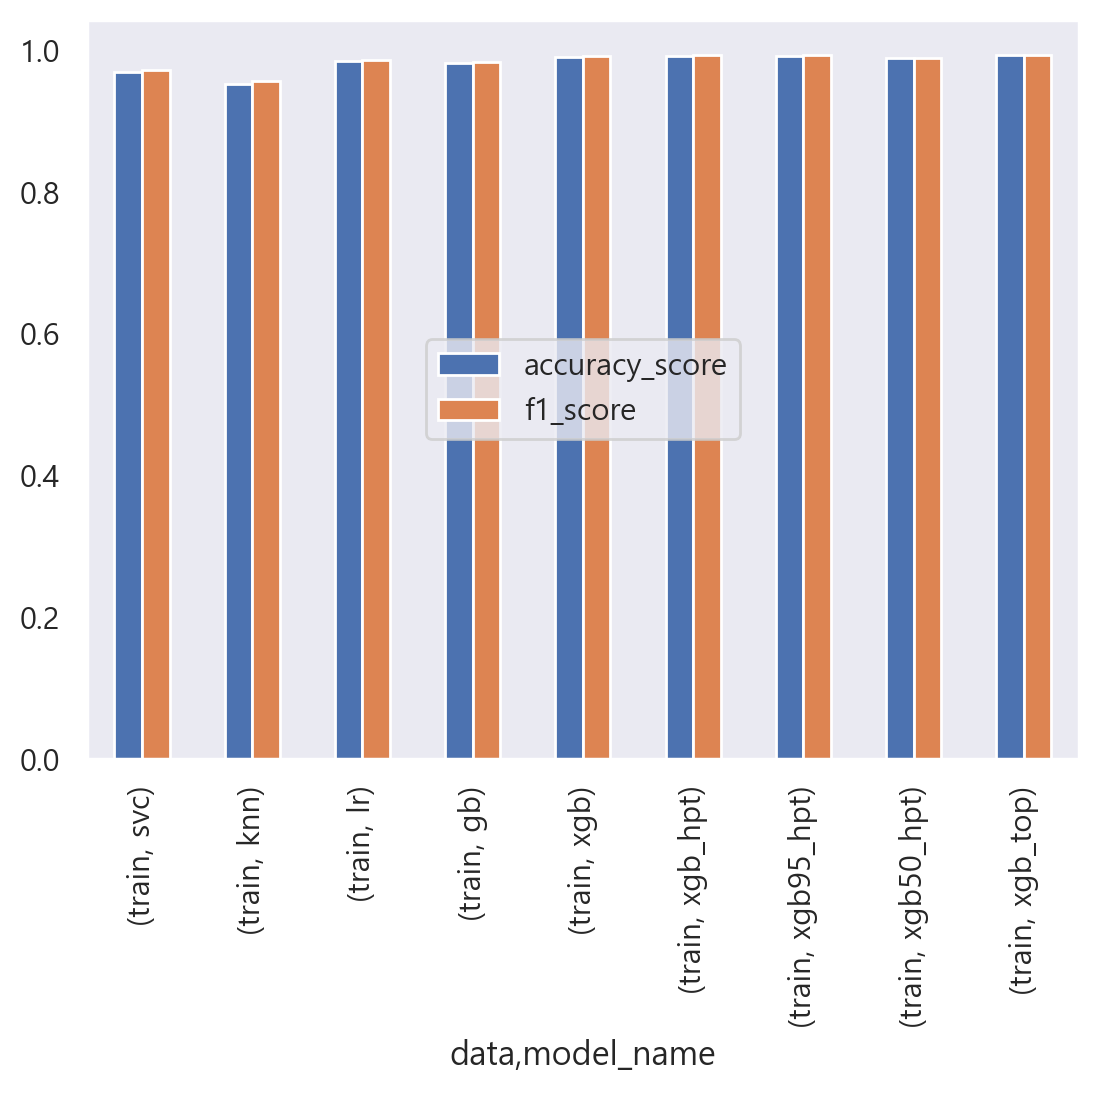

In [75]:
# pandas의 plot 함수을 사용하여 AI모델 별 accuracy_score, f1_score 수직 그래프 시각화
# grid 추가
# legend 위치 center


result_comp.plot(kind='bar')
plt.grid()
plt.legend(loc='center')
plt.show()

<Figure size 2000x1000 with 0 Axes>

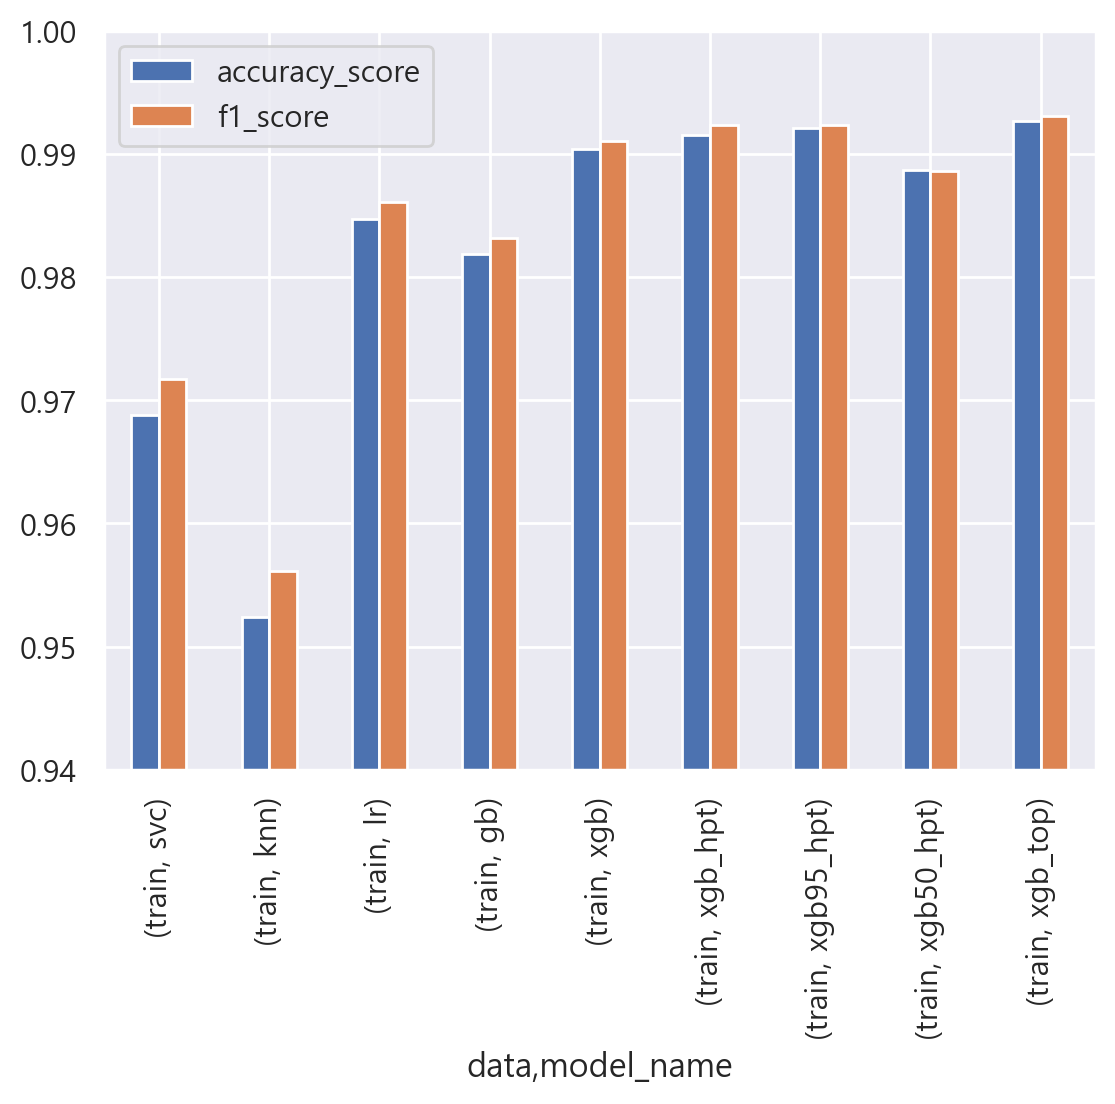

In [97]:

result_comp.plot(kind='bar')
plt.ylim(0.94,1.0)
plt.legend(loc='upper left')
plt.show()

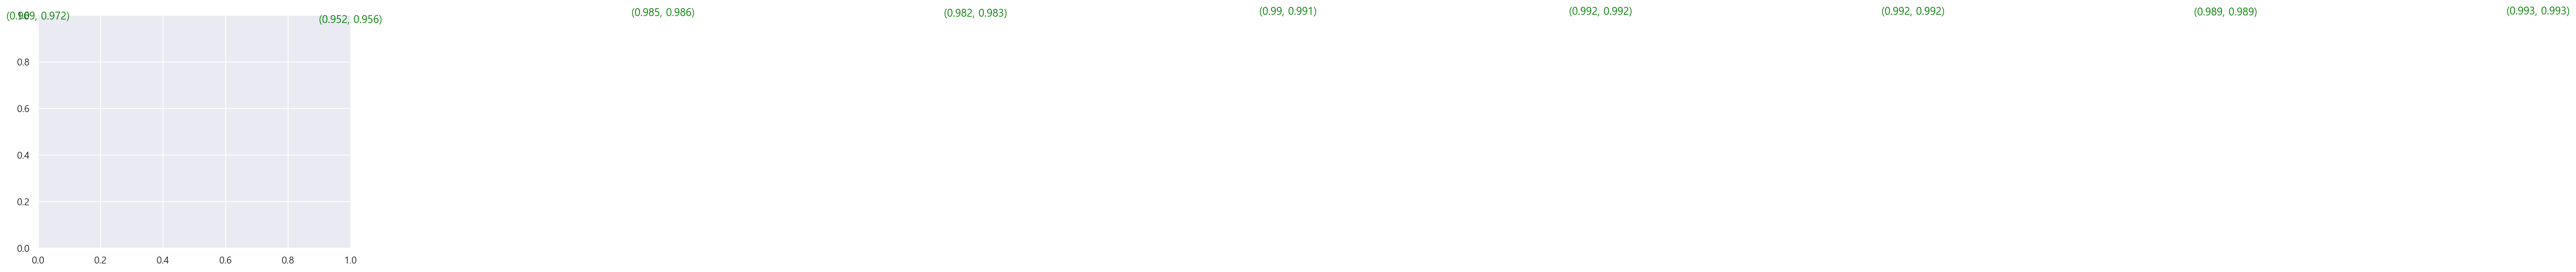

In [90]:
# barplot 수치표시
for i in range(result_comp.shape[0]):
    plt.text(i, round(result_comp['f1_score'][i], 3), (round(result_comp['accuracy_score'][i], 3), round(result_comp['f1_score'][i], 3)),                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 12, 
             color='green',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)